In [49]:
!pip install pycountry

     |████████████████████████████████| 10.1MB 3.4MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=f380c316b627a2ef9d54d98bd9d3cc67d41ebac166c8cbef8dbc059f5dbfc6ac
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


**Modules:**

In [168]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
import urllib.request
import json
import pycountry 
import matplotlib.pyplot as plt

**Reading HTML to DataFrame:**

In [169]:
def html_to_df(url: str, clean_empty = False):
    html_content = requests.get(url).text
    soup = bs(html_content, "lxml")
    table = str(soup.find("table"))
    df = pd.read_html(table)[0]
    return df

In [170]:
url = "https://github.com/robert456456456456/Web_server_log_parser/blob/master/devops.log"

In [171]:
df = html_to_df(url, clean_empty = True)
df[1]

0       64.242.88.10 - - [07/Mar/2004:16:05:49 -0800] ...
1       64.242.88.10 - - [07/Mar/2004:16:06:51 -0800] ...
2       64.242.88.10 - - [07/Mar/2004:16:10:02 -0800] ...
3       64.242.88.10 - - [07/Mar/2004:16:11:58 -0800] ...
4       64.242.88.10 - - [07/Mar/2004:16:20:55 -0800] ...
                              ...                        
1541    10.0.0.153 - - [12/Mar/2004:12:23:41 -0800] "G...
1542    10.0.0.153 - - [12/Mar/2004:12:23:41 -0800] "G...
1543    216.139.185.45 - - [12/Mar/2004:13:04:01 -0800...
1544    pd95f99f2.dip.t-dialin.net - - [12/Mar/2004:13...
1545    d97082.upc-d.chello.nl - - [12/Mar/2004:13:25:...
Name: 1, Length: 1546, dtype: object

**Cleaning the DataFrame:**

In [172]:
def helper(df):
    df = pd.DataFrame(list(df[1].apply(lambda x: x.split())))
    df[3] = df[3].apply(lambda x: x.replace('[','') )
    df[4] = df[4].apply(lambda x: x.replace(']','') )
    df[5] = df.apply(lambda x : ' '.join([x[5],x[6]]).replace('"',''), axis = 1)
    df.drop([1,2,7,6],inplace=True,axis = 1)
    return df

In [173]:
df = helper(df)
df

,0,3,4,5,8,9
0,64.242.88.10,07/Mar/2004:16:05:49,-0800,GET /twiki/bin/edit/Main/Double_bounce_sender?...,401,12846
1,64.242.88.10,07/Mar/2004:16:06:51,-0800,GET /twiki/bin/rdiff/TWiki/NewUserTemplate?rev...,200,4523
2,64.242.88.10,07/Mar/2004:16:10:02,-0800,GET /mailman/listinfo/hsdivision,200,6291
3,64.242.88.10,07/Mar/2004:16:11:58,-0800,GET /twiki/bin/view/TWiki/WikiSyntax,200,7352
4,64.242.88.10,07/Mar/2004:16:20:55,-0800,GET /twiki/bin/view/Main/DCCAndPostFix,200,5253
...,...,...,...,...,...,...
1541,10.0.0.153,12/Mar/2004:12:23:41,-0800,GET /dccstats/stats-spam-ratio.1year.png,200,1906
1542,10.0.0.153,12/Mar/2004:12:23:41,-0800,GET /dccstats/stats-hashes.1year.png,200,1582
1543,216.139.185.45,12/Mar/2004:13:04:01,-0800,GET /mailman/listinfo/webber,200,6051
1544,pd95f99f2.dip.t-dialin.net,12/Mar/2004:13:18:57,-0800,GET /razor.html,200,2869


In [174]:
columns = ['User Address','Date/Time','GMT Offset', 'Action','Return Code','Size']
df.columns  = columns
df

,User Address,Date/Time,GMT Offset,Action,Return Code,Size
0,64.242.88.10,07/Mar/2004:16:05:49,-0800,GET /twiki/bin/edit/Main/Double_bounce_sender?...,401,12846
1,64.242.88.10,07/Mar/2004:16:06:51,-0800,GET /twiki/bin/rdiff/TWiki/NewUserTemplate?rev...,200,4523
2,64.242.88.10,07/Mar/2004:16:10:02,-0800,GET /mailman/listinfo/hsdivision,200,6291
3,64.242.88.10,07/Mar/2004:16:11:58,-0800,GET /twiki/bin/view/TWiki/WikiSyntax,200,7352
4,64.242.88.10,07/Mar/2004:16:20:55,-0800,GET /twiki/bin/view/Main/DCCAndPostFix,200,5253
...,...,...,...,...,...,...
1541,10.0.0.153,12/Mar/2004:12:23:41,-0800,GET /dccstats/stats-spam-ratio.1year.png,200,1906
1542,10.0.0.153,12/Mar/2004:12:23:41,-0800,GET /dccstats/stats-hashes.1year.png,200,1582
1543,216.139.185.45,12/Mar/2004:13:04:01,-0800,GET /mailman/listinfo/webber,200,6051
1544,pd95f99f2.dip.t-dialin.net,12/Mar/2004:13:18:57,-0800,GET /razor.html,200,2869


**Top 5 visitors:**

In [175]:
df['User Address'].value_counts().head(5)

64.242.88.10                       452
10.0.0.153                         270
h24-71-236-129.ca.shawcable.net     51
cr020r01-3.sac.overture.com         44
h24-70-69-74.ca.shawcable.net       32
Name: User Address, dtype: int64

([<matplotlib.axis.XTick at 0x7f94b6a4b3c8>,
 <a list of 5 Text major ticklabel objects>)

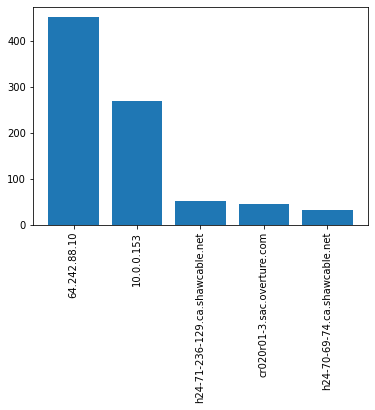

In [176]:
plt.bar(df['User Address'].value_counts().index[0 : 5], 
        df['User Address'].value_counts().values[0 : 5])
plt.xticks( df['User Address'].value_counts().index[0:5],rotation='vertical')

**Top visited pages:**

In [177]:
df['Action'].value_counts().head(5)

GET /twiki/pub/TWiki/TWikiLogos/twikiRobot46x50.gif    64
GET /                                                  47
GET /twiki/bin/view/Main/WebHome                       41
GET /icons/gnu-head-tiny.jpg                           37
GET /icons/PythonPowered.png                           37
Name: Action, dtype: int64

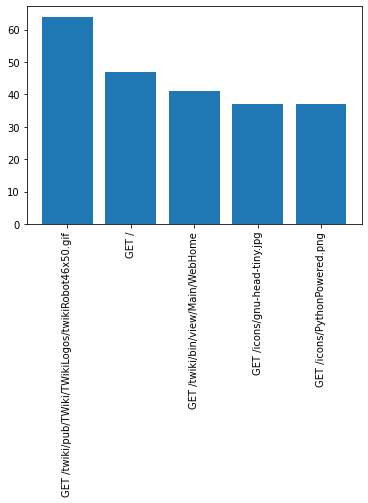

In [178]:
plt.bar(df['Action'].value_counts().index[0 : 5],
        df['Action'].value_counts().values[0 : 5])
plt.xticks( df['Action'].value_counts().index[0:5],rotation='vertical');

**Get Geo Location:**

In [179]:
def get_location(ip):
    url = "https://geolocation-db.com/jsonp/" + ip
    with urllib.request.urlopen(url) as url:
        data = json.loads(url.read().decode().split("(")[1].strip(")"))
    return {"country_code":data["country_code"], 'latitude':data['latitude'],'longitude':data['longitude']}

In [187]:
from tqdm.notebook import tqdm
ip_info = {}
for i in tqdm(df['User Address'].unique()):
    ip_info[i] = geo_location(i)

In [208]:
ip_info

{'0x503e4fce.virnxx2.adsl-dhcp.tele.dk': ('United States',
  'Mountain View',
  'California'),
 '1-320.cnc.bc.ca': ('United States', 'Mountain View', 'California'),
 '1-729.cnc.bc.ca': ('United States', 'Mountain View', 'California'),
 '10.0.0.153': ('Not found', 'Not found', 'Not found'),
 '12.22.207.235': ('United States', 'San Diego', 'California'),
 '128.227.88.79': ('United States', 'Gainesville', 'Florida'),
 '142.27.64.35': ('Canada', None, None),
 '145.253.208.9': ('Germany', None, None),
 '1513.cps.virtua.com.br': ('United States', 'Mountain View', 'California'),
 '194.151.73.43': ('Netherlands', "'s-Hertogenbosch", 'North Brabant'),
 '195.11.231.210': ('United Kingdom', None, None),
 '195.230.181.122': ('Austria', 'Mattersburg', 'Burgenland'),
 '195.246.13.119': ('Slovenia', None, None),
 '2-110.cnc.bc.ca': ('United States', 'Mountain View', 'California'),
 '2-238.cnc.bc.ca': ('United States', 'Mountain View', 'California'),
 '200-55-104-193.dsl.prima.net.ar': ('United States

In [204]:
df["Country"] = df["User Address"].apply(lambda x: ip_info[x][0])
df['latitude'] = df["User Address"].apply(lambda x: ip_info[x][1])
df['longitude'] = df["User Address"].apply(lambda x: ip_info[x][2])

In [211]:
df

,User Address,Date/Time,GMT Offset,Action,Return Code,Size,latitude,Country,longitude,country_code
0,64.242.88.10,07/Mar/2004:16:05:49,-0800,GET /twiki/bin/edit/Main/Double_bounce_sender?...,401,12846,None,United States,None,None
1,64.242.88.10,07/Mar/2004:16:06:51,-0800,GET /twiki/bin/rdiff/TWiki/NewUserTemplate?rev...,200,4523,None,United States,None,None
2,64.242.88.10,07/Mar/2004:16:10:02,-0800,GET /mailman/listinfo/hsdivision,200,6291,None,United States,None,None
3,64.242.88.10,07/Mar/2004:16:11:58,-0800,GET /twiki/bin/view/TWiki/WikiSyntax,200,7352,None,United States,None,None
4,64.242.88.10,07/Mar/2004:16:20:55,-0800,GET /twiki/bin/view/Main/DCCAndPostFix,200,5253,None,United States,None,None
...,...,...,...,...,...,...,...,...,...,...
1541,10.0.0.153,12/Mar/2004:12:23:41,-0800,GET /dccstats/stats-spam-ratio.1year.png,200,1906,Not found,Not found,Not found,None
1542,10.0.0.153,12/Mar/2004:12:23:41,-0800,GET /dccstats/stats-hashes.1year.png,200,1582,Not found,Not found,Not found,None
1543,216.139.185.45,12/Mar/2004:13:04:01,-0800,GET /mailman/listinfo/webber,200,6051,None,United States,None,None
1544,pd95f99f2.dip.t-dialin.net,12/Mar/2004:13:18:57,-0800,GET /razor.html,200,2869,Mountain View,United States,California,None


<BarContainer object of 1546 artists>

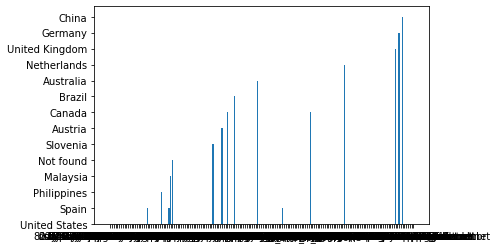

In [212]:
plt.bar(df["User Address"], df["Country"])